In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd

In [4]:
advertising = pd.read_csv("Company_data.csv")
advertising

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

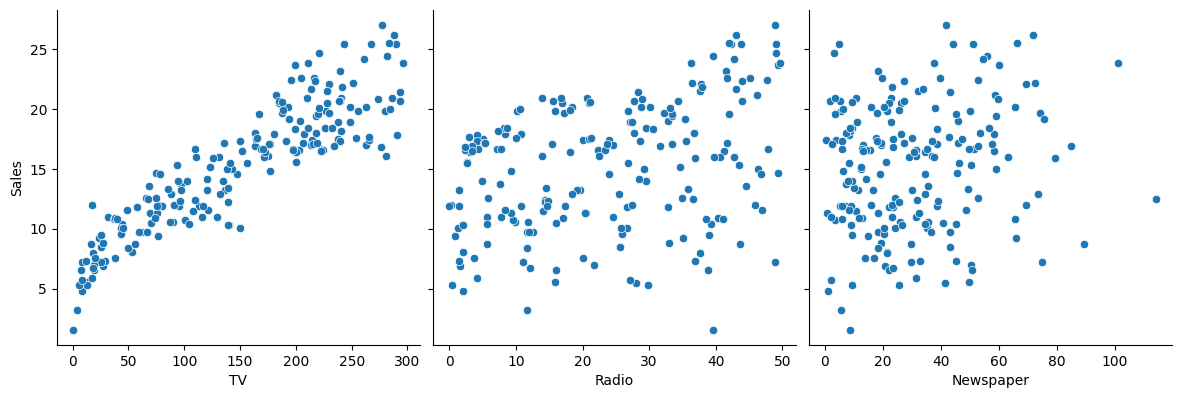

In [5]:
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

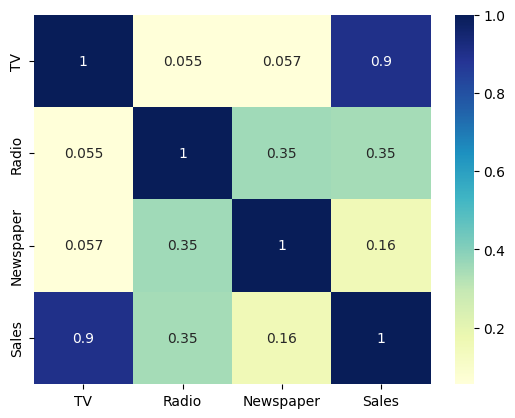

In [6]:
sns.heatmap(advertising.corr(),
cmap="YlGnBu", annot = True)
plt.show()


In [7]:
pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
X = advertising['TV']
y = advertising['Sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)



[74     213.4
 3      151.5
 185    205.0
 26     142.9
 90     134.3
        ...  
 87     110.7
 103    187.9
 67     139.3
 24      62.3
 8        8.6
 Name: TV, Length: 140, dtype: float64,
 126      7.8
 104    238.2
 99     135.2
 92     217.7
 111    241.7
 167    206.8
 116    139.2
 96     197.6
 52     216.4
 69     216.8
 164    117.2
 124    229.5
 182     56.2
 154    187.8
 125     87.2
 196     94.2
 194    149.7
 177    170.2
 163    163.5
 31     112.9
 11     214.7
 73     129.4
 15     195.4
 41     177.0
 97     184.9
 128    220.3
 133    219.8
 82      75.3
 139    184.9
 123    123.1
 83      68.4
 65      69.0
 151    121.0
 162    188.4
 170     50.0
 77     120.5
 32      97.2
 173    168.4
 174    222.4
 85     193.2
 168    215.4
 112    175.7
 171    164.5
 181    218.5
 7      120.2
 46      89.7
 75      16.9
 28     248.8
 29      70.6
 195     38.2
 40     202.5
 153    171.3
 115     75.1
 64     131.1
 59     210.7
 1       44.5
 192     17.2
 136    

In [10]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [12]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    6.948683
TV       0.054546
dtype: float64

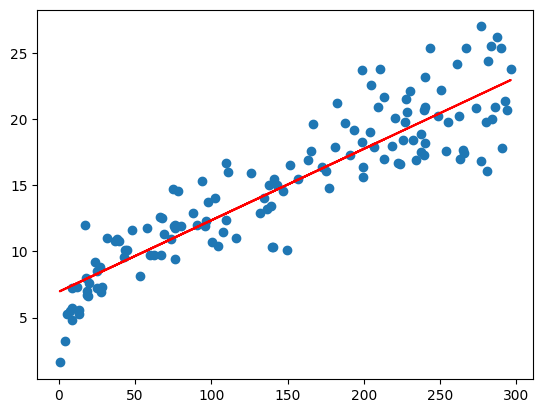

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [14]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train_pred)

In [15]:
y_train_pred = lr.predict(X_train_sm)

In [16]:
res = (y_train - y_train_pred)

C:\Users\Wicaksana Julius\AppData\Local\Temp\ipykernel_10436\3646155897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


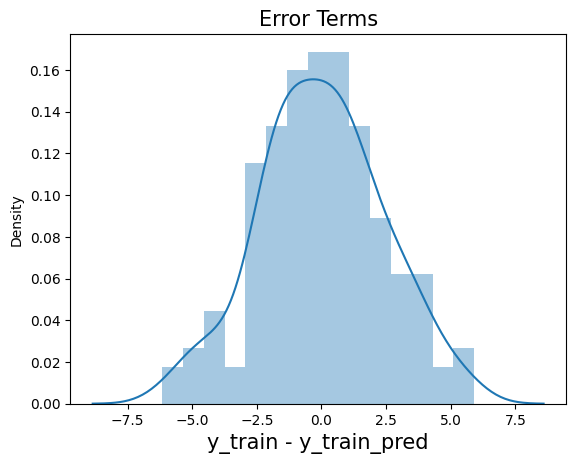

In [17]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

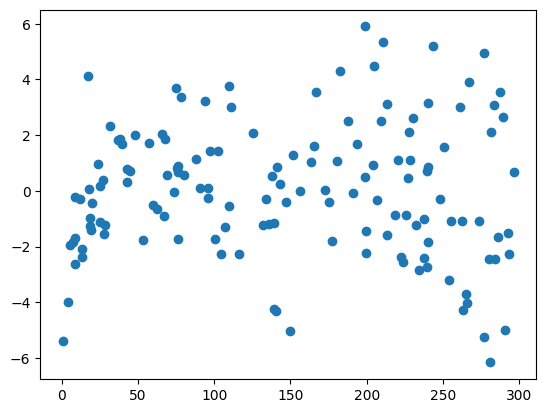

In [18]:
plt.scatter(X_train,res)
plt.show()

In [19]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [20]:
from sklearn.metrics import r2_score
r_aquared = r2_score(y_test, y_test_pred)
r_aquared

0.792103160124566

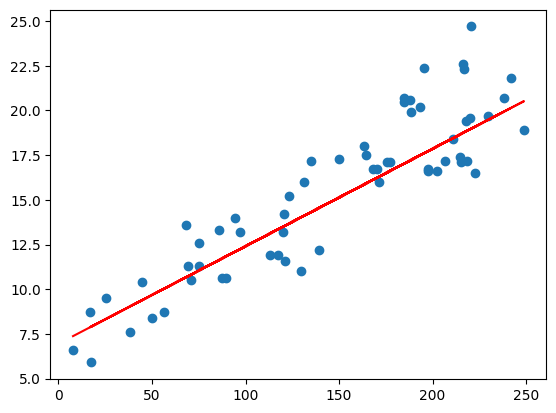

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y,train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
X_train_lm.shape
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression ()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [25]:
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


In [26]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [27]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662


In [28]:
lr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.52e-52
Time:                        14:57:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""